In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
df= pd.read_csv(r"C:\Users\USER\Downloads\spambase - Copy.data")


In [4]:
df


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
df.shape

(4600, 58)

In [6]:
df.info
              

<bound method DataFrame.info of          0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...   0.40  \
0     0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
1     0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
2     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
3     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.000   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4595  0.31  0.00    0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4596  0.00  0.00    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.30  0.00    0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4598  0.96  0.00    0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4599  0.00  0.00    0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000

In [7]:
df.sum().isnull()

0         False
0.64      False
0.64.1    False
0.1       False
0.32      False
0.2       False
0.3       False
0.4       False
0.5       False
0.6       False
0.7       False
0.64.2    False
0.8       False
0.9       False
0.10      False
0.32.1    False
0.11      False
1.29      False
1.93      False
0.12      False
0.96      False
0.13      False
0.14      False
0.15      False
0.16      False
0.17      False
0.18      False
0.19      False
0.20      False
0.21      False
0.22      False
0.23      False
0.24      False
0.25      False
0.26      False
0.27      False
0.28      False
0.29      False
0.30      False
0.31      False
0.32.2    False
0.33      False
0.34      False
0.35      False
0.36      False
0.37      False
0.38      False
0.39      False
0.40      False
0.41      False
0.42      False
0.778     False
0.43      False
0.44      False
3.756     False
61        False
278       False
1         False
dtype: bool

In [8]:
df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [9]:
df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


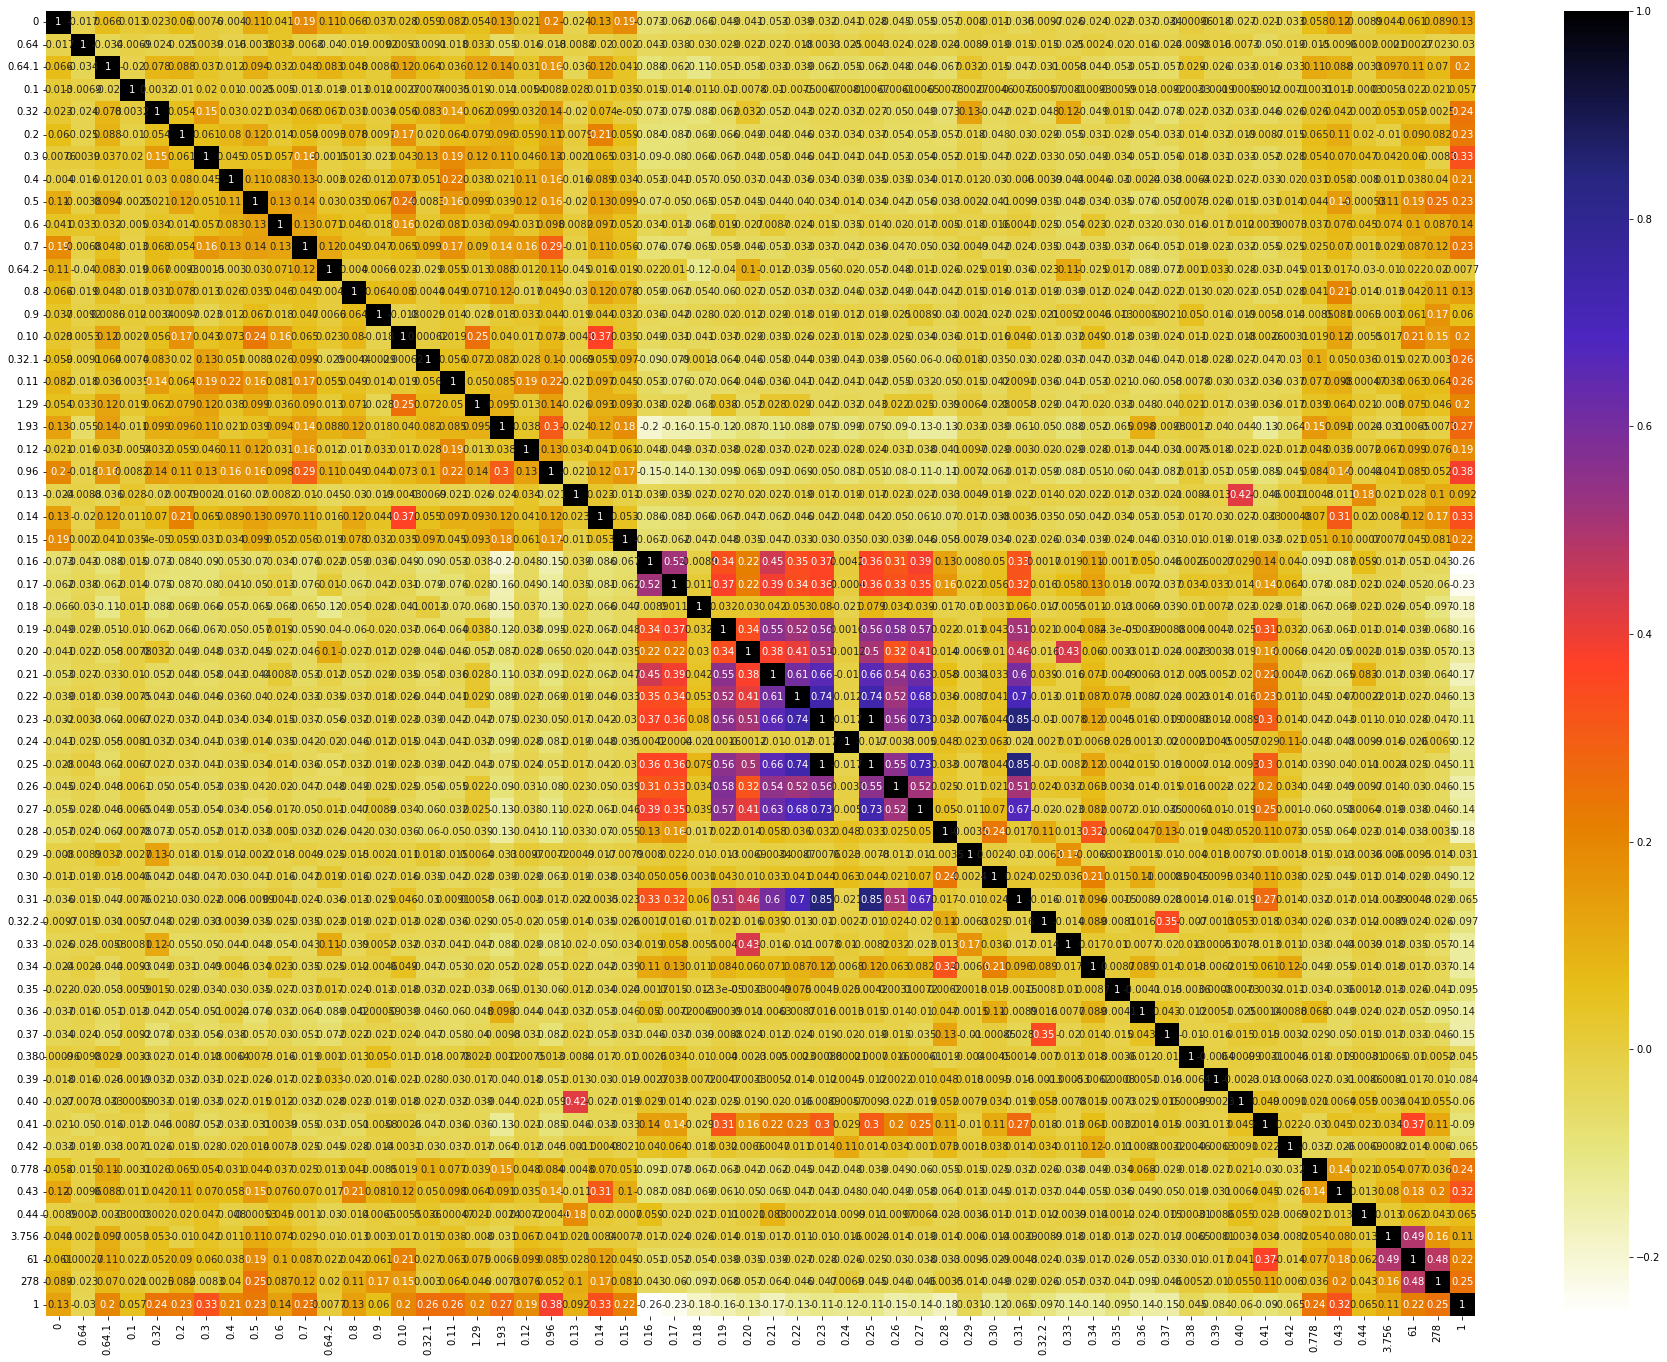

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(32,24))

sns.heatmap(df.corr(),annot=True,cmap='CMRmap_r')
plt.show()

In [11]:
df.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,...,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
0.64,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,...,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
0.64.1,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,...,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
0.1,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,...,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
0.32,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,...,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
0.2,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,...,-0.019131,-0.008745,-0.015145,0.065094,0.105671,0.019887,-0.010282,0.090177,0.082089,0.232741
0.3,0.007647,0.003939,0.036725,0.019781,0.147338,0.061142,1.000000,0.044530,0.050767,0.056787,...,-0.033099,-0.051919,-0.027663,0.053748,0.070109,0.046606,0.041563,0.059680,-0.008344,0.332255
0.4,-0.003970,-0.016261,0.012044,0.010265,0.029599,0.079543,0.044530,1.000000,0.105285,0.083110,...,-0.027441,-0.032525,-0.019557,0.031491,0.057894,-0.008018,0.011251,0.037578,0.040252,0.206915
0.5,0.106241,-0.003803,0.093843,-0.002458,0.020824,0.117416,0.050767,0.105285,1.000000,0.130601,...,-0.014657,-0.031040,0.013591,0.043685,0.149347,-0.000530,0.111306,0.189252,0.248726,0.231680
0.6,0.041171,0.032989,0.032135,-0.004951,0.034497,0.013869,0.056787,0.083110,0.130601,1.000000,...,0.011933,0.003895,0.007345,0.036789,0.075763,0.044822,0.073674,0.103314,0.087274,0.139088


In [12]:
x=df.drop(labels='1',axis=1)
y=df['1']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.3, random_state=1, stratify=y)

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [16]:
y_pred = ppn.predict(X_test_std)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix

In [18]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))


accuracy_score: 0.8855072463768116
precision_score: 0.8587360594795539
f1_score: 0.8539741219963031
recall_score: 0.8492647058823529


In [19]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.886
Accuracy: 0.886


In [20]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [21]:
# define per evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate
scores = cross_val_score(ppn, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.680 (0.104)


In [22]:
#fine tuning
grid=dict()
grid['eta0']=[0.0001,0.001,0.01,0.1,1.0]

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron



In [24]:
x,y=make_classification(n_samples=1000,n_features=10,n_informative=10,n_redundant=0,random_state=1)
per=Perceptron()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid=dict()
grid['eta0']=[0.0001,0.001,0.01,0.1,1.0]
search=GridSearchCV(per, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results=search.fit(x,y)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.857
Config: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.0001}
>0.857 with: {'eta0': 0.001}
>0.853 with: {'eta0': 0.01}
>0.847 with: {'eta0': 0.1}
>0.847 with: {'eta0': 1.0}


In [25]:
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]

In [26]:
per = Perceptron(eta0=0.0001)

In [27]:
x,y=make_classification(n_samples=1000,n_features=10,n_informative=10,n_redundant=0,random_state=1)
per=Perceptron()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid = dict()
grid['max_iter'] = [1, 10, 100, 1000, 10000]
search=GridSearchCV(per, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results=search.fit(x,y)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Mean Accuracy: 0.850
Config: {'max_iter': 1}
>0.850 with: {'max_iter': 1}
>0.836 with: {'max_iter': 10}
>0.847 with: {'max_iter': 100}
>0.847 with: {'max_iter': 1000}
>0.847 with: {'max_iter': 10000}


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
